In [23]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
caminho_arquivo = 'df_2019_ate_2024.csv'

df = pd.read_csv(caminho_arquivo, sep=';', encoding='utf-8')

In [17]:
df.head()

,Unnamed: 0,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,ESTACAO
0,0,2024/01/01,0000 UTC,0,"1014,8","1014,8","1014,6",NaN,"24,6","24,2",...,NaN,NaN,NaN,NaN,98.0,87.0,"7,6","3,3",NaN,Marambaia
1,1,2024/01/01,0100 UTC,0,"1015,4","1015,4","1014,8",NaN,"24,6","22,6",...,"24,3","22,6",98.0,89.0,89.0,79.0,"7,9","2,1",NaN,Marambaia
2,2,2024/01/01,0200 UTC,0,"1015,2","1015,5","1015,2",NaN,"23,9",NaN,...,NaN,NaN,NaN,NaN,NaN,116.0,"5,9","1,4",NaN,Marambaia
3,3,2024/01/01,0300 UTC,0,"1014,8","1015,2","1014,8",NaN,"23,6",NaN,...,NaN,NaN,NaN,NaN,NaN,165.0,"2,5",2,NaN,Marambaia
4,4,2024/01/01,0400 UTC,0,"1014,2","1014,9","1014,2",NaN,23,NaN,...,NaN,NaN,NaN,NaN,NaN,90.0,"3,1","1,7",NaN,Marambaia


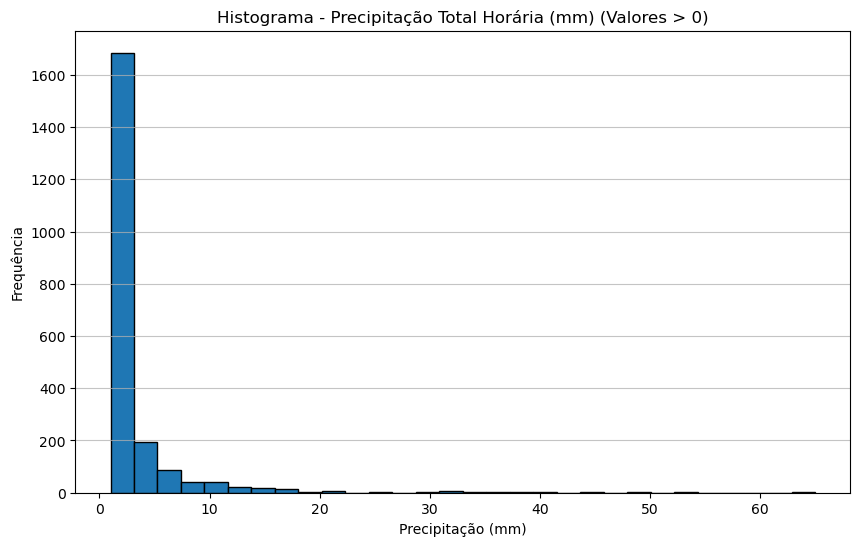

In [49]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = pd.to_numeric(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], errors='coerce')

dados_CHUVA = df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 0]['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
    
plt.figure(figsize=(10, 6))
plt.hist(dados_CHUVA.dropna(), bins=30, edgecolor='black')
plt.title('Histograma - Precipitação Total Horária (mm) (Valores > 0)')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [43]:
dados_CHUVA.describe()

count    2138.000000
mean        3.103368
std         4.825459
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        65.000000
Name: PRECIPITAÇÃO TOTAL, HORÁRIO (mm), dtype: float64

In [75]:
limite_chuva_extrema = 15

# Filtrar registros de chuva extrema
chuva_extrema = df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= limite_chuva_extrema]

In [83]:
pd.set_option('display.max_columns', None)

chuva_extrema.sort_values(by=['Data', 'Hora UTC']).reset_index(drop=True)


,Unnamed: 0,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,ESTACAO
0,216361,2019/02/05,0100 UTC,50.0,"1014,9","1014,9","1013,9",1,"22,2","21,3","23,3","21,5","22,5","20,7",95.0,94.0,95.0,117.0,"13,7","8,5",NaN,Marambaia
1,251401,2019/02/05,0100 UTC,32.0,"1012,2","1012,2",1011,"1,4","22,8","21,5","23,7","22,2",22,"20,6",92.0,88.0,92.0,142.0,"12,1","7,7",NaN,Forte de Copacabana
2,233882,2019/02/05,0200 UTC,39.0,"1015,7","1015,9","1015,5",NaN,"23,1","21,7","23,4","22,9","22,2","21,7",95.0,92.0,92.0,196.0,"4,6","2,2",NaN,Niteroi
3,216407,2019/02/06,2300 UTC,65.0,"1011,9","1012,2","1009,7",NaN,"21,6","20,8","22,4","20,8","21,5","19,7",95.0,93.0,95.0,180.0,"32,2","17,4",NaN,Marambaia
4,225167,2019/02/06,2300 UTC,18.0,"1009,5","1009,9","1008,8",2,"21,6","18,9","24,1","20,6","21,9","18,8",91.0,85.0,85.0,2.0,18,"8,8",NaN,Vila Militar
5,242688,2019/02/07,0000 UTC,21.0,"1011,9","1011,9","1009,7","9,8","21,4","18,9","21,6","20,7","19,2","18,4",88.0,85.0,85.0,198.0,"17,5","3,2",NaN,Jacarepagua
6,234074,2019/02/13,0200 UTC,17.0,"1013,7","1014,5","1013,6",NaN,"24,6",23,"26,5","24,2","23,9","22,5",94.0,86.0,91.0,278.0,"6,7",",4",NaN,Niteroi
7,251927,2019/02/26,2300 UTC,17.0,"1009,1","1009,1","1007,7","1,8","23,5","21,8",28,"23,4",24,"21,7",90.0,77.0,90.0,269.0,"13,6",7,NaN,Forte de Copacabana
8,217005,2019/03/03,2100 UTC,16.0,"1012,9","1013,5","1012,1","18,3","22,6","21,3","26,3","22,5","24,6",21,93.0,88.0,93.0,153.0,"11,4","7,5",NaN,Marambaia
9,226074,2019/03/16,1800 UTC,41.0,"1009,2","1009,6","1009,1","77,5","23,8","22,2","28,9","23,3","22,5","21,2",91.0,69.0,91.0,288.0,"12,6","1,2",NaN,Vila Militar


11.0